# SGA-PMX Demo

Skrypt przedstawia przykĹadowÄ implementacjÄ algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiÄzywania problemu komiwojaĹźera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP moĹźna znaleĹşÄ w bibliotece TSPLib [1]. Skrypt skupia siÄ na rozwiÄzywaniu instancji BERLIN52, w celu rozwiÄzywania innych instancji moĹźe okazaÄ siÄ konieczna zmiana ustawieĹ parametrĂłw algorytmu, a moĹźe teĹź i operatorĂłw ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

%matplotlib inline

## Input data

In [2]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


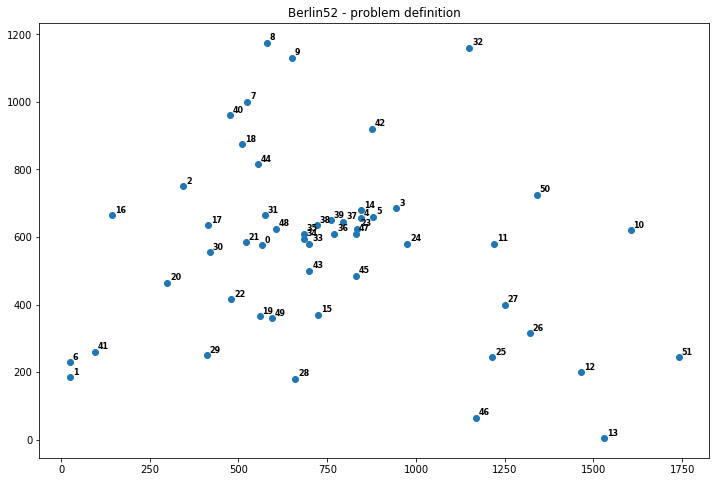

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

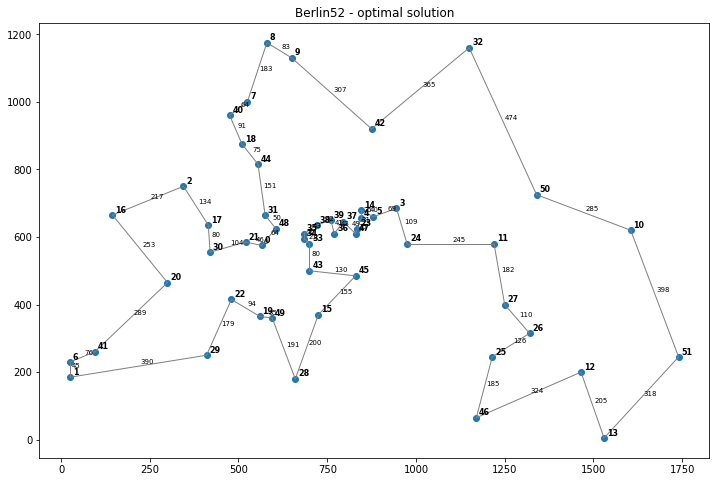

In [ ]:
from matplotlib.lines import Line2D

route = p

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

plt.title('Berlin52 - optimal solution')

plt.show()

## Objective function

In [3]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

In [ ]:
print(tsp_objective_function(p), p)

7544.3659019 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


## Random Sampling

In [42]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs_random = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs_random[i] = tsp_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs_random.argmin(), :]
print(tsp_objective_function(p), p)

13.289044857025146
20180.507071975644 [39 31 14 25 13 10 11 50 19 41  1  6 23  0 30 17  9 34 35 40  5 20  4 45
 12 51 42 32  8  3 21 29 22 36 33 38 15 49 46 24 37 16  2 43 28 47 18  7
 44 48 26 27]


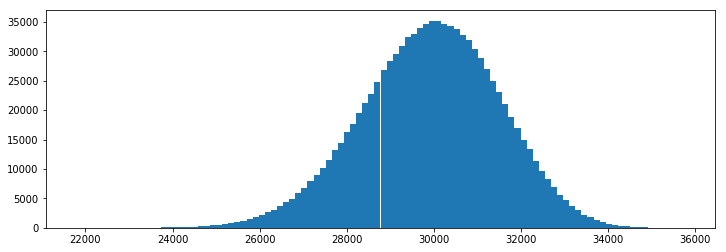

29916.5052699 1578.60276838


In [ ]:
plt.figure(figsize=(12,4))
plt.hist(costs_random, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [43]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [44]:
T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

p = np.random.permutation(n)
p_cost = tsp_objective_function(p)
costs_simulated = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = tsp_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs_simulated[t] = p_cost

print(time.time() - t0, costs_simulated.min())

9.7156400680542 8373.17191511451


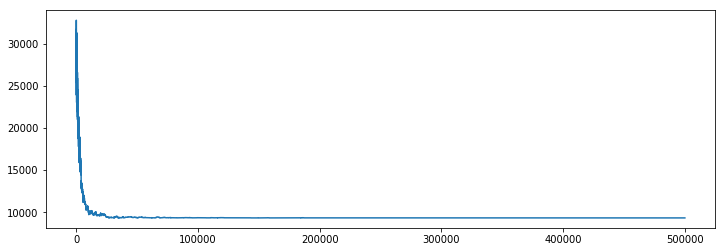

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(costs_simulated)
plt.show()

## SGA-PMX

In [ ]:
def PMX(ind1, ind2, separator_no=2): 
    new_ind1, new_ind2 = ind1.copy(), ind2.copy()
    idxs = sorted(np.random.choice(len(ind1), separator_no, replace=False))
    
    group = np.random.choice(separator_no-1)
    start, end = idxs[group], idxs[group+1]
    
    tmp = ind1[start:end].copy()
    ind1[start:end] = ind2[start:end]
    ind2[start:end] = tmp
    
    for i in range(len(ind1)):
        if start <= i < end:
            continue
            
        while ind1[i] in ind1[start:end]:
            idx_of_elem = np.nonzero(ind1[start:end] == ind1[i])[0][0]
            ind1[i] = ind2[start+idx_of_elem]
        
        while ind2[i] in ind2[start:end]:
            idx_of_elem = np.nonzero(ind2[start:end] == ind2[i])[0][0]
            ind2[i] = ind1[start+idx_of_elem]

    return ind1, ind2

In [10]:
print(PMX(np.array([1,2,3,4,5,6,7,8,9]), np.array([9,3,7,8,2,6,5,1,4])))

(array([1, 2, 7, 8, 5, 6, 7, 8, 9]), array([9, 3, 3, 4, 2, 6, 5, 1, 4]))


In [11]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [38]:
def SGA():
    population_size = 500
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = 0.95
    mutation_probability = 0.25
    number_of_iterations = 250

    time0 = time.time()

    best_objective_value = np.inf
    best_chromosome = np.zeros((1, chromosome_length))
    costs_SGA = np.zeros(number_of_iterations)

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = tsp_objective_function(current_population[i, :])

    for t in range(number_of_iterations):
        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)
        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()

        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = reverse_sequence_mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = tsp_objective_function(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]
        costs_SGA[t] = objective_values.mean()

        print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    return costs_SGA

In [39]:
%%capture
def run_SGA_multiple(number_of_runs):
    #run SGA multiple times and mean the costs_SGA
    costs_SGA_multiple = np.zeros((number_of_runs, 250))
    for i in tqdm(range(number_of_runs)):
        costs_SGA_multiple[i] = SGA()
    final_costs = np.mean(costs_SGA_multiple, axis=0)
    return final_costs

costs_SGA = run_SGA_multiple(10)

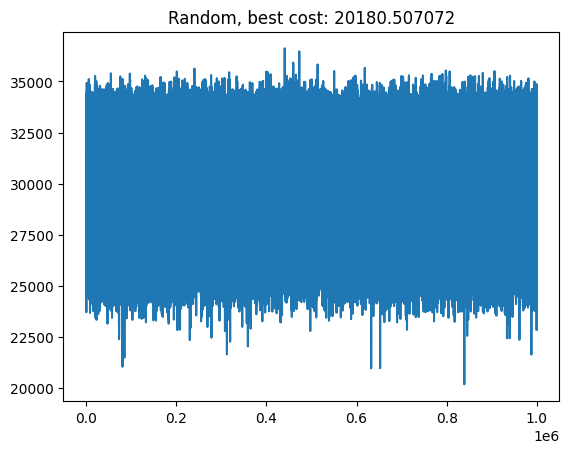

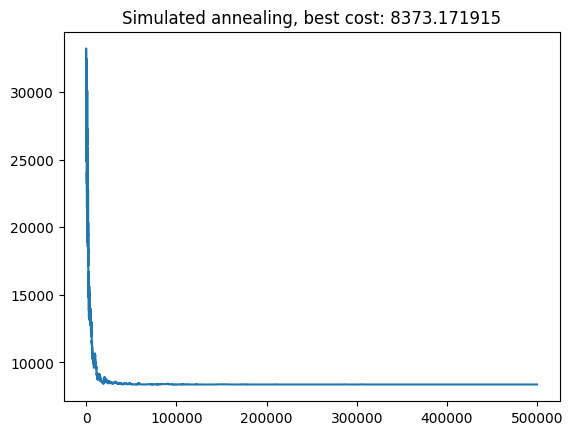

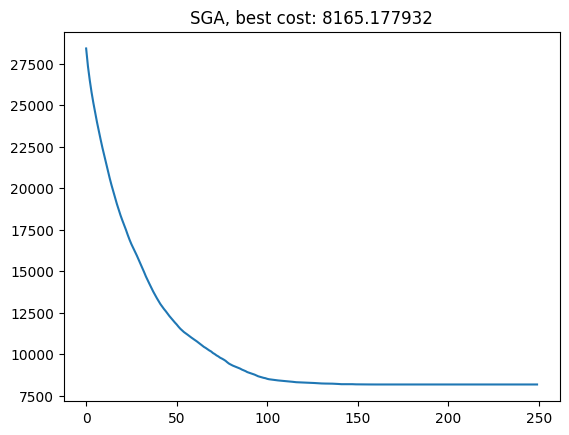

In [47]:
plt.title('Random, best cost: %f' % costs_random.min())
plt.plot(costs_random)
plt.show()
plt.title('Simulated annealing, best cost: %f' % costs_simulated.min())
plt.plot(costs_simulated)
plt.show()
plt.title('SGA, best cost: %f' % costs_SGA.min())
plt.plot(costs_SGA)
plt.show()